In [2]:
import math
import io

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

import scipy.stats
import scipy.optimize
import scipy.spatial

In [22]:
observed_data = pd.read_csv('grades.csv')
observed_data

,grade
0,3.648651
1,5.959915
2,7.387370
3,4.047515
4,2.846912
...,...
95,3.940691
96,9.120705
97,7.842357
98,3.920676


In [53]:
pass_fail_series = pd.DataFrame({'pass_or_fail': np.where(observed_data.grade >= 5, 'pass', 'fail')}) 
observed_result_proportion = pass_fail_series.value_counts(normalize=True)
observed_pass_proportion = observed_result_proportion[0]
observed_pass_proportion

0.57

In [105]:
def new_pass_proportion(test_pass_proportion, n=1000) :
    return pd.DataFrame({'pass_or_fail': np.where(np.random.rand(n) < test_pass_proportion, 'pass', 'fail')})

In [106]:
new_pass_proportion(observed_pass_proportion)

,pass_or_fail
0,pass
1,fail
2,pass
3,pass
4,pass
...,...
995,pass
996,pass
997,pass
998,fail


In [138]:
def get_a_distribution(test_pass_proportion, sampling_times=5000, sample_size=10000) :
    return pd.DataFrame([new_pass_proportion(test_pass_proportion).pass_or_fail.value_counts(normalize=True) for i in range(sampling_times)])

<Axes: >

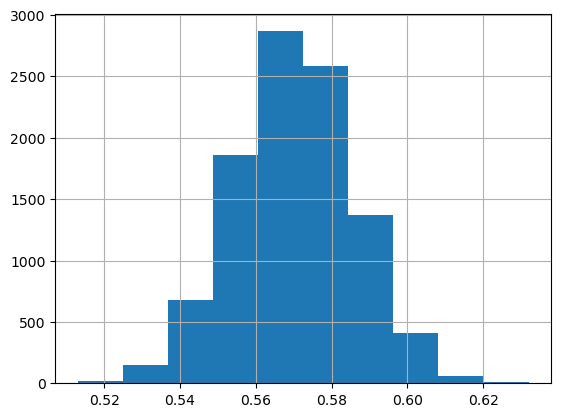

In [108]:
get_a_distribution(observed_pass_proportion)['pass'].hist()

In [109]:
print(get_a_distribution(observed_pass_proportion)['pass'].quantile(0.975))
print(get_a_distribution(observed_pass_proportion)['pass'].quantile(0.025))

0.601
0.54


In [139]:
def find_confidence_interval(target) :

    difference = 0
    upper_quantile_result = target + 1
    while upper_quantile_result > target :
        previous_test_value = target - difference
        difference = difference + 0.001
        current_test_value = target - difference
        upper_quantile_result = get_a_distribution(current_test_value).quantile(0.975)[0]
        print("Seeking lower: "+str(round(target-difference, 3))+": "+str(round(upper_quantile_result, 3))+" / "+str(target))
    lower_bound = (previous_test_value + current_test_value) / 2

    difference = 0
    lower_quantile_result = target - 1
    while lower_quantile_result < target :
        previous_test_value = target + difference
        difference = difference + 0.001
        current_test_value = target + difference
        lower_quantile_result = get_a_distribution(current_test_value).quantile(0.025)[0]
        print("Seeking upper: "+str(round(target+difference, 3))+": "+str(round(lower_quantile_result, 3))+" / "+str(target))
    upper_bound = (previous_test_value + current_test_value) / 2

    return (lower_bound, upper_bound)


In [145]:
final_result = find_confidence_interval(observed_pass_proportion)

Seeking lower: 0.569: 0.6 / 0.57
Seeking lower: 0.568: 0.597 / 0.57
Seeking lower: 0.567: 0.597 / 0.57
Seeking lower: 0.566: 0.598 / 0.57
Seeking lower: 0.565: 0.595 / 0.57
Seeking lower: 0.564: 0.596 / 0.57
Seeking lower: 0.563: 0.593 / 0.57
Seeking lower: 0.562: 0.592 / 0.57
Seeking lower: 0.561: 0.592 / 0.57
Seeking lower: 0.56: 0.59 / 0.57
Seeking lower: 0.559: 0.591 / 0.57
Seeking lower: 0.558: 0.589 / 0.57
Seeking lower: 0.557: 0.587 / 0.57
Seeking lower: 0.556: 0.586 / 0.57
Seeking lower: 0.555: 0.586 / 0.57
Seeking lower: 0.554: 0.585 / 0.57
Seeking lower: 0.553: 0.584 / 0.57
Seeking lower: 0.552: 0.582 / 0.57
Seeking lower: 0.551: 0.581 / 0.57
Seeking lower: 0.55: 0.581 / 0.57
Seeking lower: 0.549: 0.58 / 0.57
Seeking lower: 0.548: 0.578 / 0.57
Seeking lower: 0.547: 0.578 / 0.57
Seeking lower: 0.546: 0.575 / 0.57
Seeking lower: 0.545: 0.575 / 0.57
Seeking lower: 0.544: 0.575 / 0.57
Seeking lower: 0.543: 0.574 / 0.57
Seeking lower: 0.542: 0.573 / 0.57
Seeking lower: 0.541: 0.57

In [141]:
testing_frame = get_a_distribution(observed_pass_proportion)

In [143]:
testing_frame['pass'].quantile(0.975)

0.6

In [144]:
testing_frame['pass'].quantile(0.025)

0.539

In [151]:
def find_confidence_interval_beta(target) :
    
    list_of_dicts = []
    results_dict = {}

    for i in range(10) :
        testing_frame = get_a_distribution(target)
        results_dict['upper_bound'] = testing_frame['pass'].quantile(0.975)
        results_dict['lower_bound'] = testing_frame['pass'].quantile(0.025)
        list_of_dicts.append(results_dict)

    results_frame = pd.DataFrame(list_of_dicts)

    upper_bound = results_frame['upper_bound'].mean()
    lower_bound = results_frame['lower_bound'].mean()

    return lower_bound, upper_bound


In [152]:
find_confidence_interval_beta(observed_pass_proportion)

(0.5389999999999999, 0.601)